In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import zipfile
from collections import defaultdict
import ast
from gensim.models import Word2Vec

In [2]:
zf = zipfile.ZipFile("archive.zip")
r_recipes = pd.read_csv(zf.open("RAW_recipes.csv"))
print(r_recipes.shape)
print(r_recipes.columns)
r_recipes.head(3)

(231637, 12)
Index(['name', 'id', 'minutes', 'contributor_id', 'submitted', 'tags',
       'nutrition', 'n_steps', 'steps', 'description', 'ingredients',
       'n_ingredients'],
      dtype='object')


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13


In [3]:
r_interactions = pd.read_csv(zf.open("RAW_interactions.csv"))
print(r_interactions.shape)
r_interactions.head(3)

(1132367, 5)


,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...


In [4]:
data = pd.merge(r_recipes, r_interactions, right_on='recipe_id',left_on='id')
print(data.shape)
data.head(3)

(1132367, 17)


,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,user_id,recipe_id,date,rating,review
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,4470,137739,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...
1,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,593927,137739,2010-08-21,5,This was a nice change. I used butternut squas...
2,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7,178427,137739,2011-12-05,5,Excellent recipe! I used butternut squash and ...


In [6]:
#data.drop(["user_id","submitted","id"],axis=1,inplace=True)

## Feature Analysis

### Ingedients List

In [112]:
data["ingredients"] = data.ingredients.apply(lambda x: ast.literal_eval(x))

In [113]:
avg_rating_per_ingredient = defaultdict(float)
number_of_reviews_per_ingredient = defaultdict(int)

for index, row in data.iterrows():
    for ingredient in row['ingredients']:
        avg_rating_per_ingredient[ingredient] += row['rating']
        number_of_reviews_per_ingredient[ingredient] += 1

for ingredient in avg_rating_per_ingredient:
    avg_rating_per_ingredient[ingredient] /= number_of_reviews_per_ingredient[ingredient]

top_rated_ingredients = sorted(avg_rating_per_ingredient.items(), key=lambda item: item[1], reverse=True)

In [114]:
top_rated_ingredients_counts = []
for ingredient, _ in top_rated_ingredients:
    top_rated_ingredients_counts.append(number_of_reviews_per_ingredient[ingredient])

In [115]:
print(top_rated_ingredients[:10])

[('gentian root', 5.0), ('scullcap herb', 5.0), ('burnet root', 5.0), ('wood bethony', 5.0), ('cappelletti pasta', 5.0), ('fruit vinegar', 5.0), ('chili beans with chipotle pepper', 5.0), ('smart balance omega plus', 5.0), ('coffee-mate cinnamon vanilla liquid creamer', 5.0), ('crab dip', 5.0)]


In [11]:
print(top_rated_ingredients_counts[:10])

[1, 1, 1, 1, 5, 5, 2, 15, 1, 2]


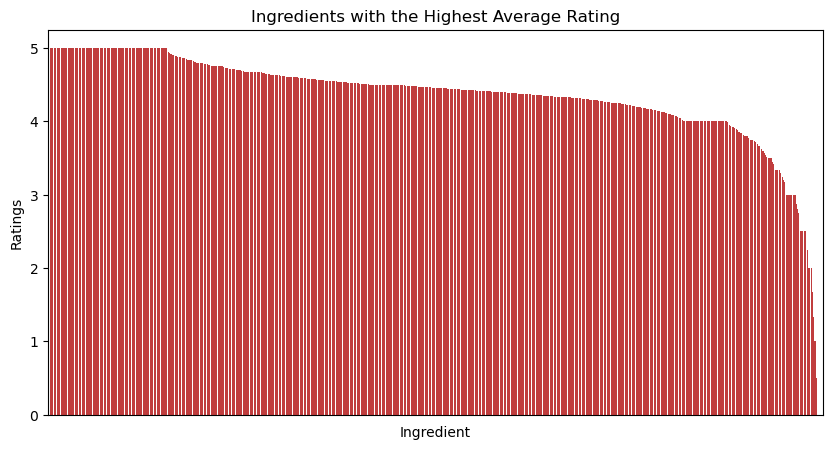

In [99]:
fig = plt.figure(figsize = (10, 5))
x = [t[0] for t in top_rated_ingredients]
y1 = [t[1] for t in top_rated_ingredients]
# creating the bar plot
sns.barplot(x=x, y=y1, color='tab:red')
 
plt.xlabel("Ingredient")
plt.ylabel("Ratings")
plt.title("Ingredients with the Highest Average Rating")
plt.xticks([])
plt.show()

C:\Users\tejas\AppData\Local\Temp\ipykernel_13184\147686278.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


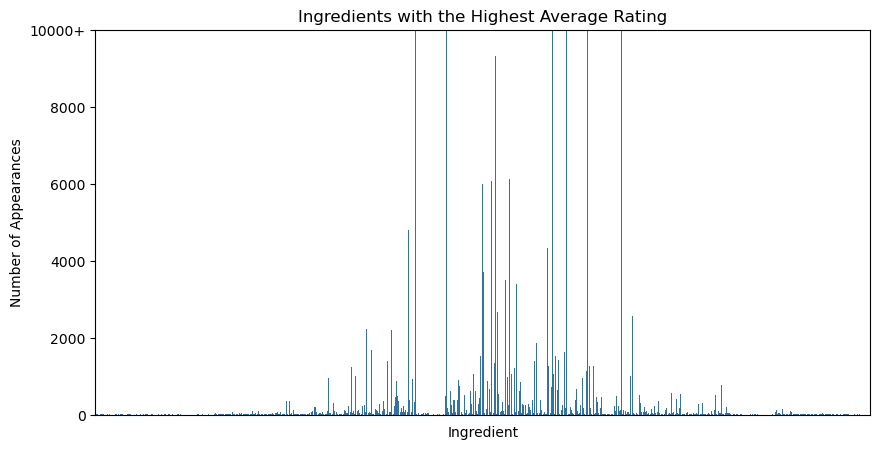

In [101]:
fig = plt.figure(figsize = (10, 5))
y2 = top_rated_ingredients_counts
sns.barplot(x=x, y=y2, color ='tab:blue')
 
plt.xlabel("Ingredient")
plt.ylabel("Number of Appearances")
plt.title("Ingredients with the Highest Average Rating")
plt.xticks([])
ax = plt.gca()
ax.set_ylim([0, 10000])
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_yticklabels()]
labels[-1] = '10000+'
ax.set_yticklabels(labels)
plt.show()

In [102]:
tmp = []
top_rated_ingredients_counts = []

for ingredient, avg_rating in top_rated_ingredients:
    if number_of_reviews_per_ingredient[ingredient] > 500:
        top_rated_ingredients_counts.append(number_of_reviews_per_ingredient[ingredient])
        tmp.append((ingredient, avg_rating))
        
top_rated_ingredients = tmp

In [103]:
print(top_rated_ingredients[:10])

[('raspberry vinegar', 4.70197486535009), ('candied ginger', 4.689591078066915), ('mixed salad greens', 4.682310469314079), ('bleu cheese salad dressing', 4.6815834767641995), ('coconut rum', 4.678129298486932), ('vanilla vodka', 4.677611940298507), ('pastry for single-crust pie', 4.675728155339806), ('butterscotch schnapps', 4.649825783972125), ('baileys irish cream', 4.648793565683646), ('grenadine', 4.644054878048781)]


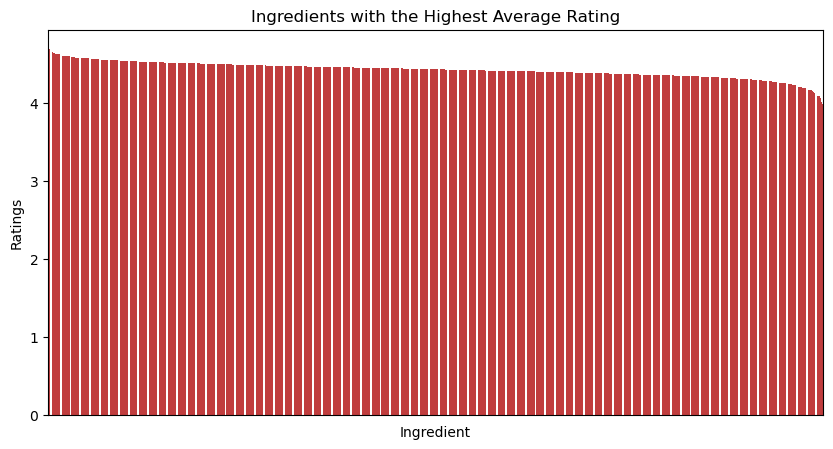

In [105]:
fig = plt.figure(figsize = (10, 5))
x = [t[0] for t in top_rated_ingredients]
y1 = [t[1] for t in top_rated_ingredients]
# creating the bar plot
sns.barplot(x=x, y=y1, color='tab:red')
 
plt.xlabel("Ingredient")
plt.ylabel("Ratings")
plt.title("Ingredients with the Highest Average Rating")
plt.xticks([])
plt.show()

C:\Users\tejas\AppData\Local\Temp\ipykernel_13016\4290055210.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


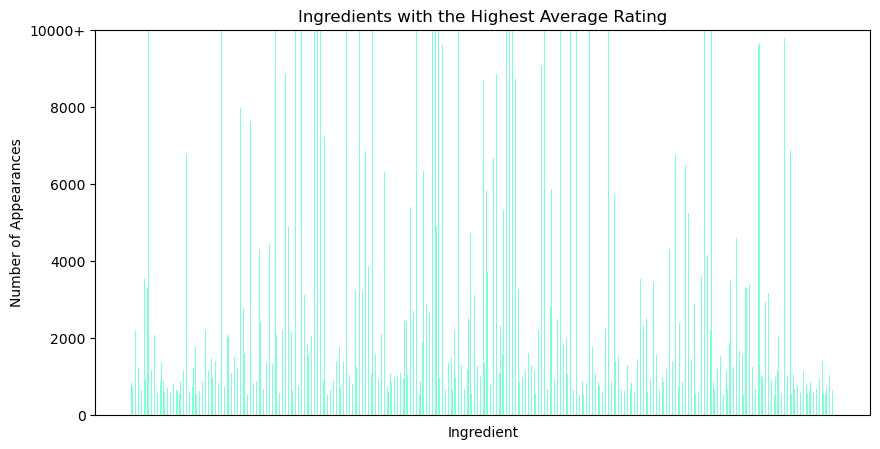

In [20]:
fig = plt.figure(figsize = (10, 5))
y2 = top_rated_ingredients_counts
plt.bar(x, y2, color ='aquamarine',
        width = 0.4)
 
plt.xlabel("Ingredient")
plt.ylabel("Number of Appearances")
plt.title("Ingredients with the Highest Average Rating")
plt.xticks([])
ax = plt.gca()
ax.set_ylim([0, 10000])
fig.canvas.draw()
labels = [item.get_text() for item in ax.get_yticklabels()]
labels[-1] = '10000+'
ax.set_yticklabels(labels)
plt.show()

In [116]:
model = Word2Vec(data["ingredients"].tolist(), min_count=500, vector_size=10, sg=1)

model.wv.similar_by_word("butter")

[('milk', 0.954086184501648),
 ('flour', 0.9441573023796082),
 ('eggs', 0.9202582836151123),
 ('pie crust', 0.9150314331054688),
 ('jam', 0.9127225875854492),
 ('self-rising flour', 0.9027511477470398),
 ('walnuts', 0.884497344493866),
 ('cinnamon sugar', 0.8656312823295593),
 ('syrup', 0.8572747111320496),
 ('self raising flour', 0.8564934730529785)]

In [117]:
model.wv.similar_by_word("grenadine")

[('peach schnapps', 0.9864170551300049),
 ('cranberry juice', 0.9838106036186218),
 ('triple sec', 0.9782124161720276),
 ('gin', 0.9781899452209473),
 ('coconut rum', 0.9745393395423889),
 ('carbonated lemon-lime beverage', 0.9709937572479248),
 ('frozen lemonade concentrate', 0.9696426391601562),
 ('light rum', 0.9677816033363342),
 ('cointreau liqueur', 0.962353527545929),
 ('club soda', 0.9601790308952332)]

In [14]:
# TODO: Check if it is worth looking into other similarity functions like jaccard etc.

### Recipe Name

In [102]:
interactionsPerRecipe = defaultdict(int)

for _, row in data.iterrows():
    interactionsPerRecipe[row['id']] += 1

In [103]:
recipeInteractions = defaultdict(int)

for recipe in interactionsPerRecipe:
    recipeInteractions[interactionsPerRecipe[recipe]] += 1

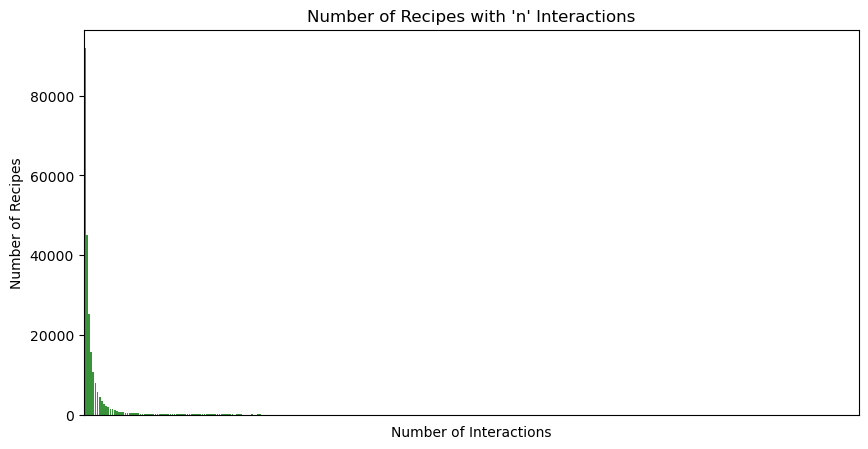

In [107]:
x = [n for n in recipeInteractions]
y = [recipeInteractions[n] for n in recipeInteractions]

fig = plt.figure(figsize = (10, 5))
# creating the bar plot
sns.barplot(x=x, y=y, color='tab:green')
 
plt.xlabel("Number of Interactions")
plt.ylabel("Number of Recipes")
plt.title("Number of Recipes with 'n' Interactions")
plt.xticks([])
plt.show()

In [5]:
from datetime import datetime

reviewsPerUser = defaultdict(list)
    
for _, row in data.iterrows():
    i = row['id']
    u = row['user_id']
    t = row['submitted']
    reviewsPerUser[u].append((t, i))

In [108]:
print(reviewsPerUser[4470][:10])

[('2005-09-16', 137739), ('2003-06-06', 63986), ('2002-06-25', 32169), ('2002-01-30', 18537), ('2007-02-19', 212188), ('2002-11-20', 47037), ('2007-09-02', 250232), ('2001-09-20', 11878), ('2005-10-21', 142215), ('2009-09-24', 391705)]


In [110]:
for u in reviewsPerUser:
    reviewsPerUser[u] = sorted(reviewsPerUser[u], key=lambda item: datetime.strptime(item[0], "%Y-%m-%d"))

In [111]:
print(reviewsPerUser[4470][:10])

[('1999-08-06', 931), ('1999-08-07', 777), ('1999-08-09', 431), ('1999-08-18', 351), ('1999-08-23', 2650), ('1999-08-23', 2785), ('1999-08-25', 238), ('1999-08-25', 834), ('1999-08-25', 2734), ('1999-08-25', 897)]


In [19]:
reviewLists = []
for u in reviewsPerUser:
    rl = list(reviewsPerUser[u])
    reviewLists.append([x[1] for x in rl])

In [20]:
model2 = Word2Vec(reviewLists,
                 min_count=5, # Words/items with fewer instances are discarded
                 vector_size=10, # Model dimensionality
                 window=3, # Window size
                 sg=1) # Skip-gram model

In [21]:
recipeIdToName = defaultdict(str)

for _, row in data.iterrows():
    recipeIdToName[row['id']] = row['name']

In [22]:
recipeIdToName[18537]

'wait forever  pork chops'

In [23]:
for b in model2.wv.similar_by_word(18537):
    print(recipeIdToName[b[0]], b[1])

easy chocolate cinnamon fudge 0.9951841831207275
portabella brisket 0.9951084852218628
chocolate stout cake 0.9950546622276306
fusilli with lemon cream sauce  asparagus  and peas 0.9943066835403442
super fudgy triple chocolate espresso brownies 0.9942867159843445
quick coleslaw 0.994129478931427
ham and provolone pinwheels 0.9930822253227234
crab omelet 0.9930479526519775
ww core chocolate banana smoothies 0.9927623271942139
broiled cheese buns 0.9927445650100708


In [24]:
recipeIdToName[250232]

'skinny  fries'

In [25]:
for b in model2.wv.similar_by_word(250232):
    print(recipeIdToName[b[0]], b[1])

super easy sauteed italian peppers 0.9980998635292053
tomato and zucchini salad 0.9980202913284302
lighter caesar salad dressing 0.9977791905403137
barefoot contessa s butternut squash risotto 0.9977760910987854
nutella rolls 0.9977132081985474
christmas broccoli salad 0.9975515604019165
sesame teriyaki skewers  chicken on a stick 0.9975172281265259
hainanese chicken rice 0.9974926114082336
oven roasted vegetables 0.9974122047424316
shepherd s pie  oamc 0.9972147345542908


### Steps Text

In [54]:
import string
from gensim.parsing.preprocessing import remove_stopwords

wordCount = defaultdict(int)
punctuation = set(string.punctuation)

for index, row in data.iterrows():
    steps_text = ''.join([c for c in row['steps'].lower() if not c in punctuation])
    steps_text = remove_stopwords(steps_text)
    for word in steps_text.split():
        wordCount[word] += 1

print(len(wordCount))

56468


In [45]:
# # from nltk.stem import PorterStemmer
# from gensim.parsing.porter import PorterStemmer
# import string
# from gensim.parsing.preprocessing import remove_stopwords

# wordCount = defaultdict(int)
# punctuation = set(string.punctuation)
# ps = PorterStemmer()

# for index, row in data.iterrows():
#     steps_text = ''.join([c for c in row['steps'].lower() if not c in punctuation])
#     steps_text = remove_stopwords(steps_text)
#     steps_text = ps.stem_sentence(steps_text)
#     for word in steps_text.split():
#         wordCount[word] += 1

# print(len(wordCount))


45323


In [57]:
counts = [(wordCount[w], w) for w in wordCount]
counts.sort()
counts.reverse()
words = [x[1] for x in counts]
print(words[:10])

['add', 'minutes', 'heat', '1', 'stir', 'mix', 'bowl', 'pan', 'mixture', '2']


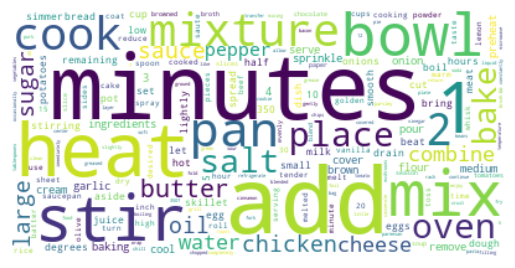

In [86]:
from wordcloud import WordCloud
# wc_text = " ".join([word for word in wordCount])
word_cloud = WordCloud(collocations = False, background_color = 'white').generate_from_frequencies(wordCount)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [88]:
allWordsCount = defaultdict(int)

for index, row in data.iterrows():
    steps_text = ''.join([c for c in row['steps'].lower() if not c in punctuation])
    for word in steps_text.split():
        allWordsCount[word] += 1

print(len(allWordsCount))

56786


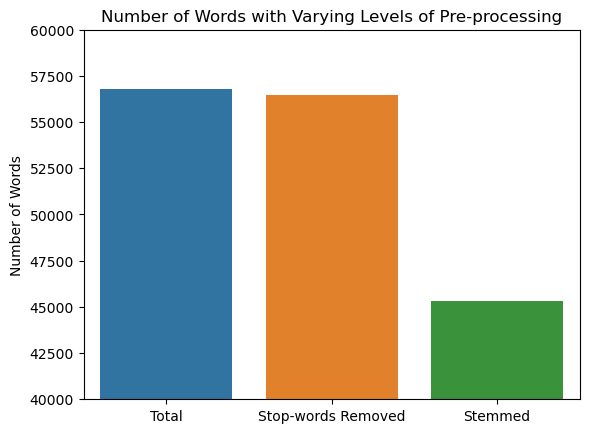

In [87]:

# who v/s fare barplot
sns.barplot(x = ["Total", "Stop-words Removed", "Stemmed"],
            y = [56786, 56468, 45323])

plt.ylabel("Number of Words")
plt.title("Number of Words with Varying Levels of Pre-processing")
plt.ylim([40000, 60000])

# Show the plot
plt.show()

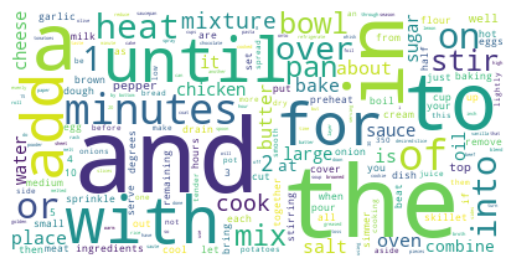

In [89]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate_from_frequencies(allWordsCount)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [55]:
df = defaultdict(int)

for _, row in data.iterrows():
    steps_text = ''.join([c for c in row['steps'].lower() if not c in punctuation])
    steps_text = remove_stopwords(steps_text)
    for w in set(steps_text.split()):
        df[w] += 1

In [49]:
# df = defaultdict(int)

# for _, row in data.iterrows():
#     steps_text = ''.join([c for c in row['steps'].lower() if not c in punctuation])
#     steps_text = remove_stopwords(steps_text)
#     steps_text = ps.stem_sentence(steps_text)
#     for w in set(steps_text.split()):
#         df[w] += 1

In [30]:
rev = data.iloc[9]
print(rev)

name                                             alouette  potatoes
id                                                            59389
minutes                                                          45
contributor_id                                                68585
submitted                                                2003-04-14
tags              ['60-minutes-or-less', 'time-to-make', 'course...
nutrition                 [368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]
n_steps                                                          11
steps             ['place potatoes in a large pot of lightly sal...
description       this is a super easy, great tasting, make ahea...
ingredients       [spreadable cheese with garlic and herbs, new ...
n_ingredients                                                    11
user_id                                                     1232243
recipe_id                                                     59389
date                                            

In [31]:
import math

tf = defaultdict(int)
r = ''.join([c for c in rev['steps'].lower() if not c in punctuation])
r = remove_stopwords(r)
for w in r.split():
    # Note = rather than +=, different versions of tf could be used instead
    tf[w] = 1
    
tfidf = dict(zip(words,[tf[w] * math.log2(len(data) / df[w]) for w in words]))
tfidfQuery = [tf[w] * math.log2(len(data) / df[w]) for w in words]

In [32]:
maxTf = [(tf[w],w) for w in words]
maxTf.sort(reverse=True)
maxTfIdf = [(tfidf[w],w) for w in words]
maxTfIdf.sort(reverse=True)
maxTfIdf[:10]

[(19.11091018055961, 'thealouette'),
 (19.11091018055961, 'spreadalouette'),
 (8.193538101082769, 'gentle'),
 (7.68674389174151, '8x8'),
 (7.176113588381207, 'yellow'),
 (6.437380256158465, 'possible'),
 (6.284163098039406, 'plates'),
 (6.091145727709871, 'flat'),
 (6.059531280872087, 'diced'),
 (5.942943287728227, 'buttered')]

In [169]:
maxTf[:10]

[(1, 'yellow'),
 (1, 'water'),
 (1, 'transfer'),
 (1, 'thealouette'),
 (1, 'tender'),
 (1, 'temperature'),
 (1, 'spreadalouette'),
 (1, 'spatula'),
 (1, 'sides'),
 (1, 'set')]

In [33]:
def Cosine(x1,x2):
    numer = 0
    norm1 = 0
    norm2 = 0
    for a1,a2 in zip(x1,x2):
        numer += a1*a2
        norm1 += a1**2
        norm2 += a2**2
    if norm1*norm2:
        return numer / math.sqrt(norm1*norm2)
    return 0

In [34]:
prevChecked = defaultdict(bool)

similarities = []
for _, rev2 in data.iloc[:10000].iterrows():
    if rev2['id'] in prevChecked:
        continue
    prevChecked[rev2['id']] = True
    tf = defaultdict(int)
    r = ''.join([c for c in rev2['steps'].lower() if not c in punctuation])
    r = remove_stopwords(r)
    for w in r.split():
        # Note = rather than +=
        tf[w] = 1
    tfidf2 = [tf[w] * math.log2(len(data) / df[w]) for w in words]
    similarities.append((Cosine(tfidfQuery, tfidf2), rev2['steps']))

In [35]:
similarities.sort(reverse=True)
similarities[:10]

[(1.0,
  '[\'place potatoes in a large pot of lightly salted water and bring to a gentle boil\', \'cook until potatoes are just tender\', \'drain\', \'place potatoes in a large bowl and add all ingredients except the"alouette"\', \'mix well and transfer to a buttered 8x8 inch glass baking dish with 2 inch sides\', \'press the potatoes with a spatula to make top as flat as possible\', \'set aside for 2 hours at room temperature\', \'preheat oven to 350^f\', \'spread"alouette" evenly over potatoes and bake 15 minutes\', \'divide between plates\', \'garnish with finely diced red and yellow bell peppers\']'),
 (0.1896923044476954,
  "['melt chocolate chips and add frosting stirring quickly , as it will set up as you stir', 'press into buttered 8x8 pan , refrigerate for about 10 to 15 minutes before cutting into 2 inch squares']"),
 (0.13557134479236907,
  "['mix broth , coconut milk , spices and sugar in a pot and bring to gentle boil', 'stir in pasta , reduce to medium heat and simmer for

### ???

In [74]:
userIDs = []

for _, row in data.iterrows():
    u = row['user_id']
    if not u in userIDs: userIDs.append(u)

print(len(userIDs))

226570


### Review Text

In [49]:
import string
from gensim.parsing.preprocessing import remove_stopwords

wordCount = defaultdict(int)
punctuation = set(string.punctuation)

for index, row in data.iterrows():
    if type(row['steps']) != List(str):
        continue
    review_text = ''.join([c for c in row['steps'].lower() if not c in punctuation])
    review_text = remove_stopwords(review_text)
    for word in review_text.split():
        wordCount[word] += 1

print(len(wordCount))

329469


In [50]:
counts = [(wordCount[w], w) for w in wordCount]
counts.sort()
counts.reverse()
words = [x[1] for x in counts[:10000]]
print(words[:10])

['recipe', 'thanks', 'great', 'good', 'time', 'easy', 'added', 'like', 'delicious', 'sauce']


## Feature Utility

In [146]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=6752)

In [147]:
print(len(test))

226474


In [11]:
# last 2000 of the test set used

In [148]:
userHistory = defaultdict(list)
allInteractions = defaultdict(float)
for _, row in train.iterrows():
    i = row['id']
    u = row['user_id']
    r = row['rating']
    userHistory[u].append(i)
    allInteractions[(u, i)] = r

In [149]:
recipeIngredients = defaultdict(list)
recipeSteps = defaultdict(list)
for _, row in data.iterrows():
    i = row['id']
    ingList = row['ingredients']
    recipeIngredients[i] = ingList
    stepsList = row['steps']
    recipeSteps[i] = stepsList

In [150]:
mean_rating = 0

for _, row in train.iterrows():
    mean_rating += row['rating']

mean_rating /= len(train)
print(mean_rating)

4.412119312104189


In [151]:
import string
from gensim.parsing.preprocessing import remove_stopwords
import math

punctuation = set(string.punctuation)

def getTFIDF(i, steps):
    tf = defaultdict(int)
    r = ''.join([c for c in steps.lower() if not c in punctuation])
    r = remove_stopwords(r)
    for w in r.split():
        # Note = rather than +=, different versions of tf could be used instead
        tf[w] = 1
    return [tf[w] * math.log2(len(data) / df[w]) for w in words]


In [152]:
def MSE(predictions, labels):
    differences = [(x-y)**2 for x,y in zip(predictions,labels)]
    return sum(differences) / len(differences)

In [153]:
def Cosine(x1,x2):
    numer = 0
    norm1 = 0
    norm2 = 0
    for a1,a2 in zip(x1,x2):
        numer += a1*a2
        norm1 += a1**2
        norm2 += a2**2
    if norm1*norm2:
        return numer / math.sqrt(norm1*norm2)
    return 0

### Ingredients

In [154]:
def get_ingList_vector(s):
    return np.sum(np.array([model.wv[i] if i in list(model.wv.index_to_key) else [0.0]*10 for i in s]), axis=0)

v1 = get_ingList_vector(["butter", "sugar", "flour"])
v2 = get_ingList_vector(["salt", "chicken", "paprika"])
v3 = get_ingList_vector(["eggs", "chocolate", "sprinkles"])

print(Cosine(v1, v2))
print(Cosine(v1, v3))

0.41633782778201517
0.914009435306045


In [155]:
pred = []
c = 0

for _, row in test.iloc[-2000:].iterrows():
    u = row['user_id']
    i = row['id']
    if c%100==0: 
        print('\n'+str(c))
    elif c%10 == 0:
        print(".", end="")
    if u in userHistory:
        r_pred = 0
        norm_fact = 0
        for i2 in userHistory[u]:
            if (u, i2) in allInteractions:
                v1 = get_ingList_vector(recipeIngredients[i])
                v2 = get_ingList_vector(recipeIngredients[i2])
                sim = Cosine(v1, v2)
                r_pred += sim*allInteractions[(u, i2)]
                norm_fact += sim
        # for b in model2.wv.similar_by_word(i, topn=1000000):
            # if b[0] in userHistory[u] and (u, b[0]) in allInteractions:
            #     r_pred += b[1]*allInteractions[(u, b[0])]

        # r_pred /= len(userHistory[u])
        if norm_fact != 0:
            r_pred /= norm_fact
        else:
            r_pred = mean_rating
    else:
        r_pred = mean_rating

    pred.append(r_pred)
    c += 1


0
.........
100
.........
200
.........
300
.........
400
.........
500
.........
600
.........
700
.........
800
.........
900
.........
1000
.........
1100
.........
1200
.........
1300
.........
1400
.........
1500
.........
1600
.........
1700
.........
1800
.........
1900
.........

In [156]:
print(len(pred))

2000


In [157]:
print(pred[:10])
print(list(test.iloc[-2000:-2000+10]['rating']))

[4.888872362576887, 4.812120169976549, 4.138244360539789, 4.950818125647675, 4.501112095163186, 4.789300129407224, 4.981322186218369, 4.46945818522386, 4.486564912430918, 4.159309070930671]
[5, 4, 4, 5, 5, 4, 5, 5, 5, 5]


In [158]:
MSE(pred, list(test.iloc[-2000:]['rating']))

1.6439892591962253

In [159]:
import pickle
with open('pred_ing_sim.pkl', 'wb') as f:
    pickle.dump(pred, f)
# with open('pred_ing_sim.pkl', 'rb') as f:
#     tst = pickle.load(f)

In [ ]:
# 4.061534057441531
# Could look into alternative to averaging ingredient vectors and finding cosine sim
# do tfidf weighting of ingredients

### Recipe ID

In [151]:
recipe_mses =[]
avg_matches = []
for n in [1000, 10000, 100000, 1000000, 10000000]:
    avgRecipeMatches = defaultdict(int)
    pred = []
    for _, row in test.iloc[:100].iterrows():
        u = row['user_id']
        i = row['id']
        if u in userHistory and i in list(model2.wv.index_to_key):
            r_pred = 0
            norm_fact = 0
            for b in model2.wv.similar_by_word(i, topn=n):
                if b[0] in userHistory[u] and (u, b[0]) in allInteractions:
                    avgRecipeMatches[b[0]] += 1
                    r_pred += b[1]*allInteractions[(u, b[0])]
                    norm_fact += b[1]
            if norm_fact != 0:
                r_pred /= norm_fact
            else:
                r_pred = mean_rating
        else:
            r_pred = mean_rating

        pred.append(r_pred)

    recipe_mses.append(MSE(pred, list(test.iloc[:100]['rating'])))
    arm = 0
    for rec in avgRecipeMatches:
        arm += avgRecipeMatches[rec]
    arm /= len(avgRecipeMatches)
    avg_matches.append(arm)

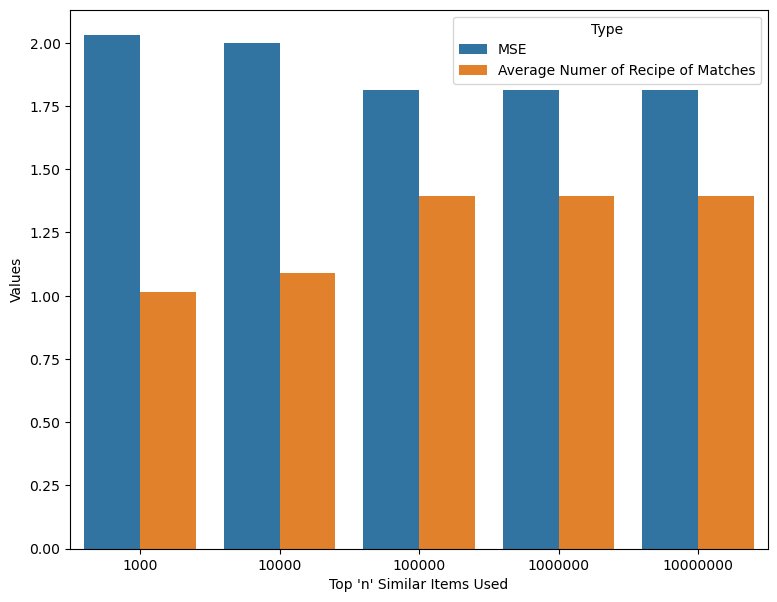

In [154]:
raw_data = {
    "Top 'n' Similar Items Used": [1000, 10000, 100000, 1000000, 10000000]*2,
    "Values": recipe_mses + avg_matches,
    "Type": ["MSE"]*5+["Average Numer of Recipe of Matches"]*5
}

raw_data = pd.DataFrame(raw_data)

plt.figure(figsize = (9, 7))
sns.barplot(x="Top 'n' Similar Items Used", y='Values', hue='Type', data=raw_data) 
plt.show()

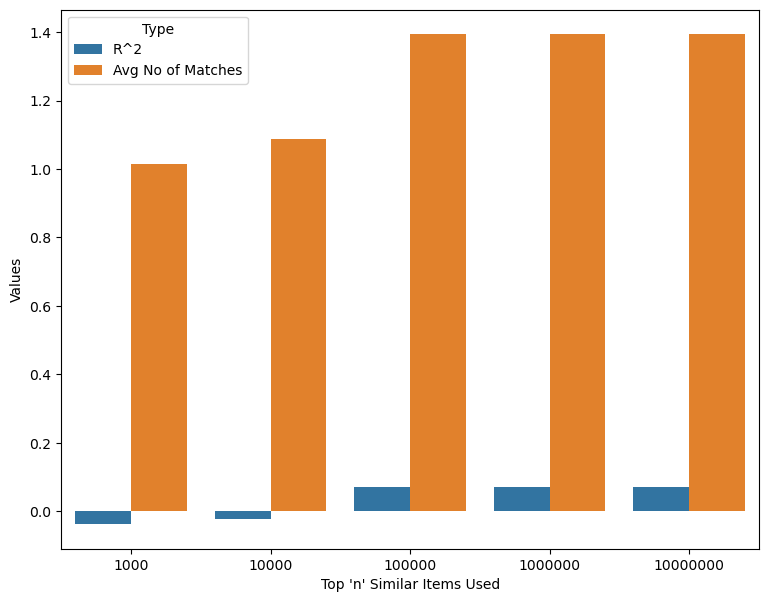

In [149]:
def get_variance(arr):
    mean = sum(arr) / len(arr)
    summ = 0
    for x in arr:
        summ+=(x-mean)**2
    return summ/len(arr)

raw_data = {
    "Top 'n' Similar Items Used": [1000, 10000, 100000, 1000000, 10000000]*2,
    "Values": [1-r/get_variance(list(test.iloc[:100]['rating'])) for r in recipe_mses] + avg_matches,
    "Type": ["R^2"]*5+["Percentage of Recipe of Matches"]*5
}

raw_data = pd.DataFrame(raw_data)

plt.figure(figsize = (9, 7))
sns.barplot(x="Top 'n' Similar Items Used", y='Values', hue='Type', data=raw_data) 
plt.show()

In [71]:
pred = []
for _, row in test.iloc[:100].iterrows():
    u = row['user_id']
    i = row['id']
    if u in userHistory and i in list(model2.wv.index_to_key):
        r_pred = 0
        norm_fact = 0
        for b in model2.wv.similar_by_word(i, topn=100000):
            if b[0] in userHistory[u] and (u, b[0]) in allInteractions:
                r_pred += b[1]*allInteractions[(u, b[0])]
                norm_fact += b[1]
        # for i2 in userHistory[u]:
        #     if i2 in list(model2.wv.index_to_key) and (u, i2) in allInteractions:
        #         sim = model2.wv.similarity(i, i2)
        #         r_pred += sim*allInteractions[(u, i2)]
        if norm_fact != 0:
            r_pred /= norm_fact
        else:
            r_pred = 3.0
    else:
        r_pred = 3.0

    pred.append(r_pred)

In [72]:
print(len(pred))

100


In [73]:
print(pred[:10])
print(list(test.iloc[:10]['rating']))

[5.0, 3.0, 4.832540896490774, 3.0, 4.649437872058912, 3.0, 5.0, 3.940336947628386, 4.759442773689917, 4.514676271199288]
[4, 5, 5, 0, 5, 5, 5, 4, 5, 3]


In [74]:
MSE(pred, list(test.iloc[:100]['rating']))

2.1474053845810834

In [277]:
# Varying topn doesnt have too much effect
# topn=10,000 - mse=2.4808079907357308
# topn=100,000 - mse=2.1474053845810834

### Steps

In [51]:
pred = []
c = 0

for _, row in test.iloc[:10].iterrows():
    if c%100==0: print(c)
    u = row['user_id']
    i = row['id']
    if u in userHistory:
        r_pred = 0
        norm_fact = 0
        t1 = getTFIDF(i, recipeSteps[i])
        for i2 in userHistory[u]:
            if (u, i2) in allInteractions:
                t2 = getTFIDF(i2, recipeSteps[i2])
                sim = Cosine(t1, t2)
                # print(sim, allInteractions[(u, i2)])
                r_pred += sim*allInteractions[(u, i2)]
                norm_fact += sim
        # for b in model2.wv.similar_by_word(i, topn=1000000):
            # if b[0] in userHistory[u] and (u, b[0]) in allInteractions:
            #     r_pred += b[1]*allInteractions[(u, b[0])]

        if norm_fact != 0:
            r_pred /= norm_fact
        else:
            r_pred = mean_rating
    else:
        r_pred = mean_rating

    pred.append(r_pred)
    c += 1

0


In [52]:
print(pred[:10])
print(list(test.iloc[:10]['rating']))

[5.0, 4.411248810259731, 4.778015142378417, 4.411248810259731, 4.6010166852605625, 4.704701906850204, 4.999999999999999, 3.9798894218260656, 4.23602626633224, 4.904436982042251]
[4, 5, 5, 0, 5, 5, 5, 4, 5, 3]


In [53]:
MSE(pred, list(test.iloc[:10]['rating']))

2.5312350475369065

In [69]:
pred = []
c = 1451

for _, row in test.iloc[-2000+1451:].iterrows():
    if c%100==0: print(c)
    u = row['user_id']
    i = row['id']
    if u in userHistory:
        r_pred = 0
        norm_fact = 0
        t1 = getTFIDF(i, recipeSteps[i])
        for i2 in userHistory[u]:
            if (u, i2) in allInteractions:
                t2 = getTFIDF(i2, recipeSteps[i2])
                sim = Cosine(t1, t2)
                # print(sim, allInteractions[(u, i2)])
                r_pred += sim*allInteractions[(u, i2)]
                norm_fact += sim
        # for b in model2.wv.similar_by_word(i, topn=1000000):
            # if b[0] in userHistory[u] and (u, b[0]) in allInteractions:
            #     r_pred += b[1]*allInteractions[(u, b[0])]

        if norm_fact != 0:
            r_pred /= norm_fact
        else:
            r_pred = mean_rating
    else:
        r_pred = mean_rating

    pred.append(r_pred)
    c += 1

KeyboardInterrupt: 

In [70]:
print(len(pred))

40


In [71]:
with open('pred_steps_sim-1411.pkl', 'rb') as f:
    tst = pickle.load(f)

In [72]:
tst = tst+pred

In [73]:
len(tst)

1451

In [75]:
MSE(tst, list(test.iloc[-2000:-2000+1451]['rating']))

1.771785286664314

In [76]:
pred = tst

In [77]:
import pickle
with open('pred_steps_sim-1451.pkl', 'wb') as f:
    pickle.dump(pred, f)
# with open('pred_steps_sim-1411.pkl', 'rb') as f:
#     tst = pickle.load(f)

In [78]:
print(len(pred))

1451


In [79]:
print(pred[:10])
print(list(test.iloc[-2000:-2000+10]['rating']))

[4.411248810259731, 4.721486267923916, 4.8499000505546475, 4.411248810259731, 4.630145369338928, 5.0, 4.250781057474044, 4.411248810259731, 4.656228368733843, 4.411248810259731]
[5, 5, 5, 0, 5, 5, 5, 5, 5, 5]


In [80]:
MSE(pred, list(test.iloc[-2000:-2000+1451]['rating']))

1.771785286664314

In [25]:
# 1.743749609108722

In [157]:
def getBOW(steps):
    tf = defaultdict(int)
    r = ''.join([c for c in steps.lower() if not c in punctuation])
    r = remove_stopwords(r)
    for w in r.split():
        # Note = rather than +=, different versions of tf could be used instead
        tf[w] = 1
    return [tf[w] for w in words]

In [161]:
rev['name']

'alouette  potatoes'

In [158]:
rev_tfidf = getTFIDF(rev['id'], rev['steps'])
rev_BOW = getBOW(rev['steps'])

In [160]:
len(rev_BOW) - len(rev_tfidf)

0

In [177]:
rev = data.iloc[6969]
print(rev['name'])

import math

tf = defaultdict(int)
r = ''.join([c for c in rev['steps'].lower() if not c in punctuation])
r = remove_stopwords(r)
for w in r.split():
    # Note = rather than +=, different versions of tf could be used instead
    tf[w] += 1
    
tfidf = dict(zip(words,[tf[w] * math.log2(len(data) / df[w]) for w in words]))
tfidfQuery = [tf[w] * math.log2(len(data) / df[w]) for w in words]

maxTf = [(tf[w],w) for w in words]
maxTf.sort(reverse=True)
maxTfIdf = [(tfidf[w],w) for w in words]
maxTfIdf.sort(reverse=True)
maxTfIdf[:10]

15 minute garlic lemon chicken


[(11.268209615297785, 'chicken'),
 (6.313552625288333, 'dust'),
 (5.946553166237021, 'flatten'),
 (4.276389751113747, 'fry'),
 (3.893179625109708, 'broth'),
 (3.849072352821623, 'slightly'),
 (3.5080228729102028, 'lemon'),
 (3.3508297921388746, 'pan'),
 (3.036695530994615, 'juice'),
 (2.753701846597738, 'hot')]

In [176]:
maxTf[:10]

[(4, 'chicken'),
 (2, 'pan'),
 (2, 'minutes'),
 (1, 'slightly'),
 (1, 'salt'),
 (1, 'remove'),
 (1, 'pour'),
 (1, 'pepper'),
 (1, 'oil'),
 (1, 'lemon')]

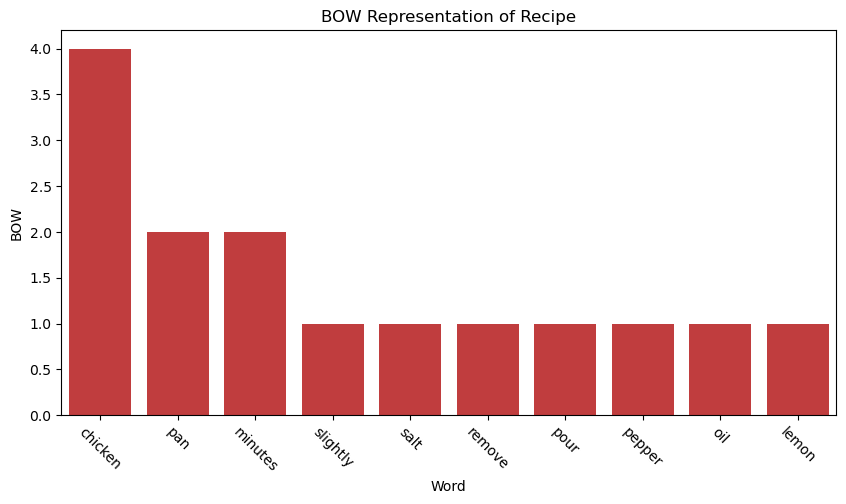

In [185]:
fig = plt.figure(figsize = (10, 5))
x = [w[1] for w in maxTf][:10]
y1 = [w[0] for w in maxTf][:10]
# creating the bar plot
sns.barplot(x=x, y=y1, color='tab:red')
 
plt.xlabel("Word")
plt.ylabel("BOW")
plt.title("BOW Representation of Recipe")
# plt.xticks([])
plt.xticks(rotation=-45)
plt.show()

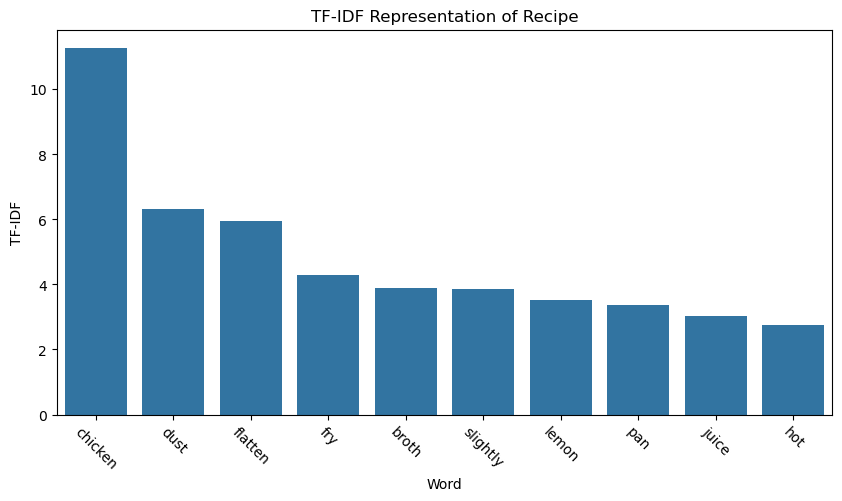

In [186]:
fig = plt.figure(figsize = (10, 5))
x = [w[1] for w in maxTfIdf][:10]
y2 = [w[0] for w in maxTfIdf][:10]
# creating the bar plot
sns.barplot(x=x, y=y2, color='tab:blue')
 
plt.xlabel("Word")
plt.ylabel("TF-IDF")
plt.title("TF-IDF Representation of Recipe")
plt.xticks(rotation=-45)
plt.show()